In [1]:
from environments.single_stock import SingleStockEnv
from model_architecture.DQN_all import DQNAgents
from agent_training.train import train_agent
from visualisation.visualisation import visualize_trades_with_benchmark
from data_preperation.data_perp import prepare_data


In [3]:
df = prepare_data('CSCO')

env = SingleStockEnv(df)



                                Open       High        Low      Close  \
Date                                                                    
2020-03-17 00:00:00-04:00  29.709068  31.036130  28.767280  30.394003   
2020-03-18 00:00:00-04:00  28.904268  32.286136  28.518994  31.780996   
2020-03-19 00:00:00-04:00  31.721061  33.664565  30.950511  32.286133   
2020-03-20 00:00:00-04:00  32.765585  32.936820  30.308381  30.479612   
2020-03-23 00:00:00-04:00  30.402559  30.667973  28.887143  29.623446   

                             Volume  Dividends  Stock Splits        RSI  \
Date                                                                      
2020-03-17 00:00:00-04:00  41572400        0.0           0.0  38.421466   
2020-03-18 00:00:00-04:00  56904300        0.0           0.0  44.833717   
2020-03-19 00:00:00-04:00  58319700        0.0           0.0  46.137796   
2020-03-20 00:00:00-04:00  48582500        0.0           0.0  40.594403   
2020-03-23 00:00:00-04:00  39823400   

Training on device: mps
New best reward! Portfolio Value: 88670.74245550757 Total Reward: -524.6460156928217
New best reward! Portfolio Value: 142914.16647854538 Total Reward: 349.6685201194675
New best reward! Portfolio Value: 170600.5860370064 Total Reward: 387.8386247442642
Episode: 10, Reward: 251.49, Portfolio Value: $142731.13, Epsilon: 0.01
New best reward! Portfolio Value: 171968.30924406892 Total Reward: 434.9661534461317
New best reward! Portfolio Value: 180992.33622669146 Total Reward: 519.106272890527
Episode: 20, Reward: 553.30, Portfolio Value: $191494.18, Epsilon: 0.01
New best reward! Portfolio Value: 191494.18435719603 Total Reward: 553.3004761667142
Episode: 30, Reward: 486.24, Portfolio Value: $171548.23, Epsilon: 0.01
New best reward! Portfolio Value: 192404.20444039474 Total Reward: 578.0676845810976
Episode: 40, Reward: 496.34, Portfolio Value: $178794.46, Epsilon: 0.01
Episode: 50, Reward: 458.06, Portfolio Value: $175842.73, Epsilon: 0.01
Episode: 60, Reward: 43

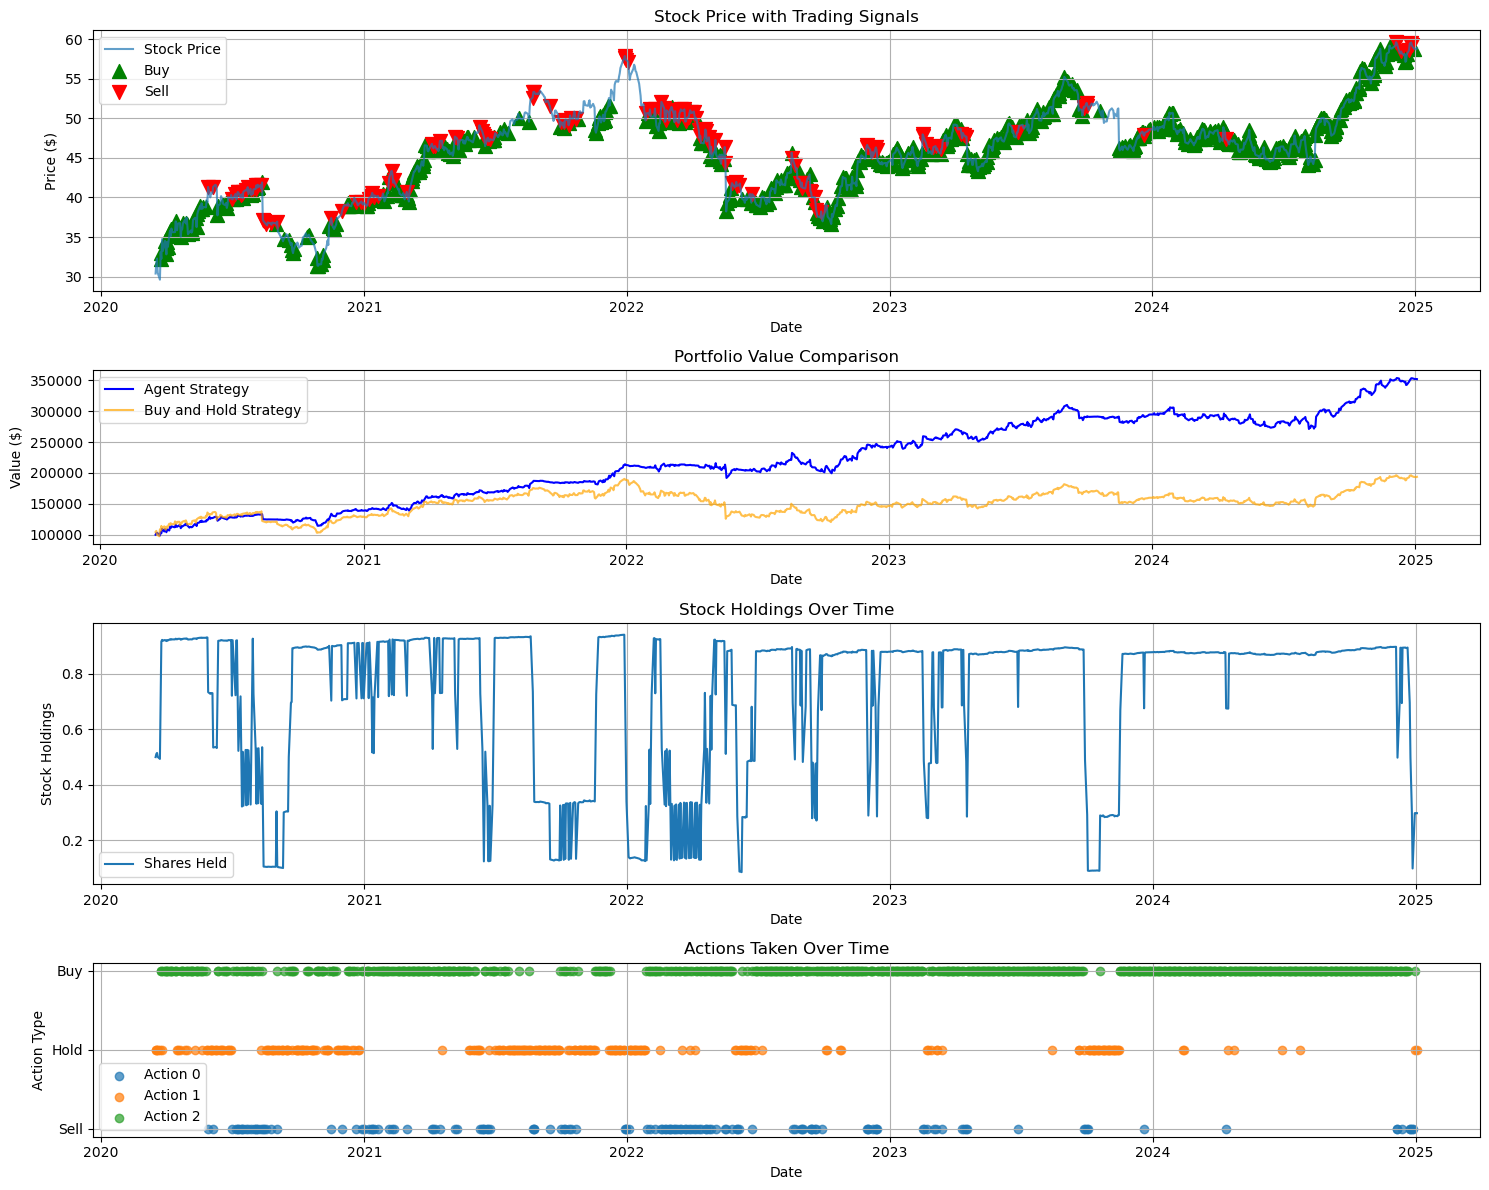


=== Performance Comparison ===
Initial Investment: $50,001.87

Agent Strategy:
Final Value: $351,698.44
Total Return: 603.37%
Number of Trades: 940

Buy and Hold Strategy:
Final Value: $193,663.85
Total Return: 287.31%

Risk Metrics:
Agent Sharpe Ratio: 0.99
Buy-Hold Sharpe Ratio: 0.68
Agent Maximum Drawdown: 14.20%
Buy-Hold Maximum Drawdown: 36.68%


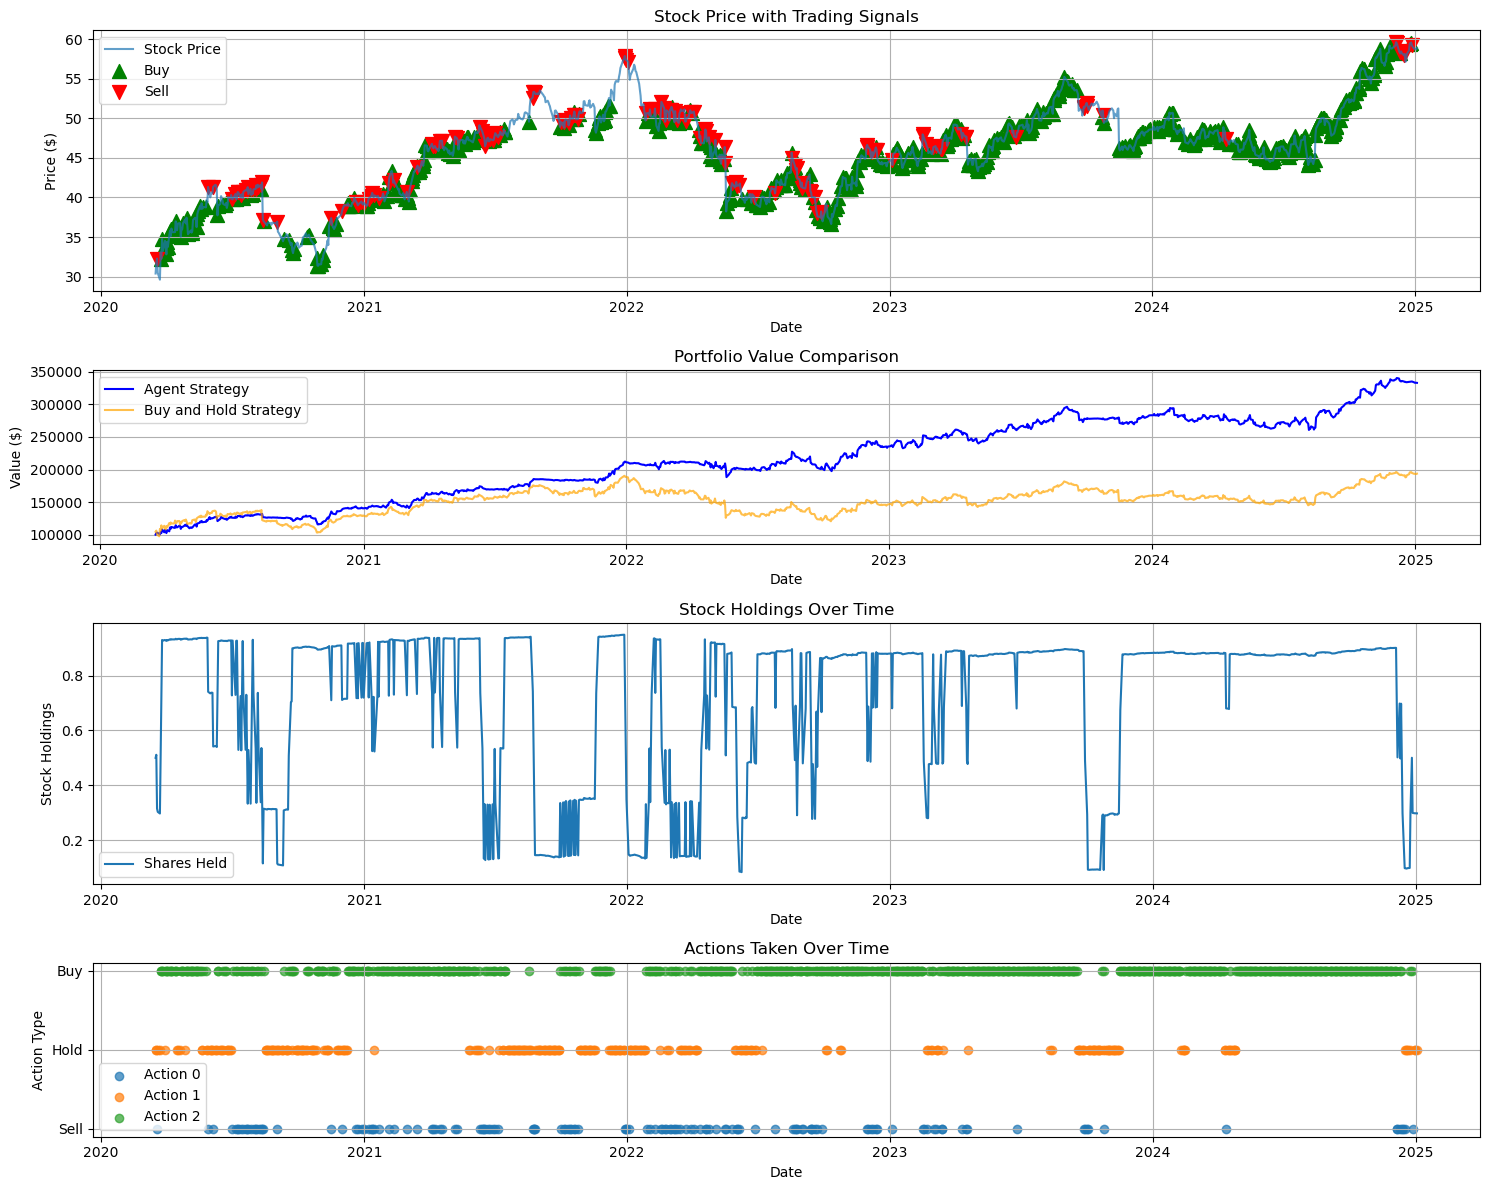


=== Performance Comparison ===
Initial Investment: $50,001.87

Agent Strategy:
Final Value: $333,121.40
Total Return: 566.22%
Number of Trades: 918

Buy and Hold Strategy:
Final Value: $193,663.85
Total Return: 287.31%

Risk Metrics:
Agent Sharpe Ratio: 0.97
Buy-Hold Sharpe Ratio: 0.68
Agent Maximum Drawdown: 13.14%
Buy-Hold Maximum Drawdown: 36.68%


In [4]:
# Create agent
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
agent = DQNAgents(state_size, action_size, model_type='standard')

rewards_history, portfolio_history, best_state_dict = train_agent(env, agent, episodes=500)

agent.policy_net.load_state_dict(best_state_dict)

visualize_trades_with_benchmark(env, agent, df)

agent.policy_net.load_state_dict(best_state_dict)

visualize_trades_with_benchmark(env, agent, df)

                                Open       High        Low      Close  \
Date                                                                    
2020-03-17 00:00:00-04:00  29.709063  31.036124  28.767275  30.393997   
2020-03-18 00:00:00-04:00  28.904264  32.286132  28.518991  31.780993   
2020-03-19 00:00:00-04:00  31.721061  33.664565  30.950511  32.286133   
2020-03-20 00:00:00-04:00  32.765589  32.936824  30.308385  30.479616   
2020-03-23 00:00:00-04:00  30.402561  30.667975  28.887145  29.623447   

                             Volume  Dividends  Stock Splits        RSI  \
Date                                                                      
2020-03-17 00:00:00-04:00  41572400        0.0           0.0  38.421417   
2020-03-18 00:00:00-04:00  56904300        0.0           0.0  44.833693   
2020-03-19 00:00:00-04:00  58319700        0.0           0.0  46.137778   
2020-03-20 00:00:00-04:00  48582500        0.0           0.0  40.594403   
2020-03-23 00:00:00-04:00  39823400   

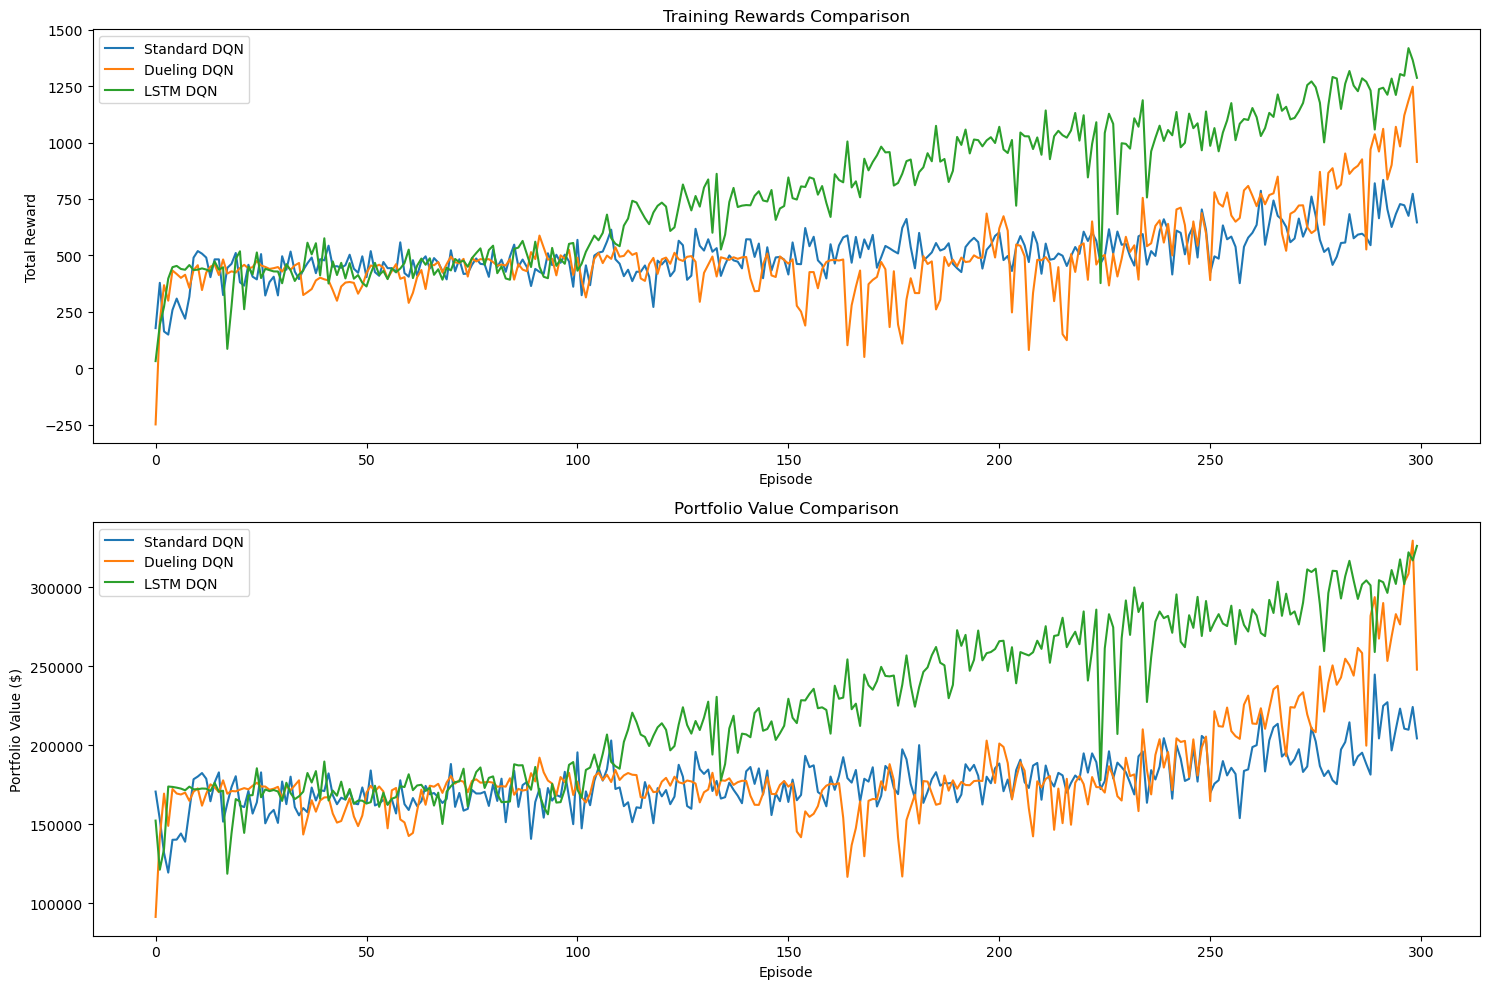


Final Statistics:

Standard DQN:
Final Reward: 646.12
Final Portfolio Value: $204475.28
Average Reward: 503.26
Average Portfolio Value: $176762.71

Dueling DQN:
Final Reward: 914.34
Final Portfolio Value: $247999.81
Average Reward: 501.56
Average Portfolio Value: $182784.54

LSTM DQN:
Final Reward: 1287.17
Final Portfolio Value: $326311.95
Average Reward: 771.70
Average Portfolio Value: $224210.27


In [5]:
# Function to compare different models
import matplotlib.pyplot as plt
import numpy as np

def compare_models(env, episodes=100):
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    
    models = {
        'Standard DQN': DQNAgents(state_size, action_size, model_type='standard'),
        'Dueling DQN': DQNAgents(state_size, action_size, model_type='dueling'),
        'LSTM DQN': DQNAgents(state_size, action_size, model_type='lstm')
    }
    
    results = {}
    
    for model_name, agent in models.items():
        print(f"\nTraining {model_name}...")
        rewards_history, portfolio_history, _ = train_agent(env, agent, episodes=episodes)
        results[model_name] = {
            'rewards': rewards_history,
            'portfolio': portfolio_history
        }
    
    # Plot comparison results
    plt.figure(figsize=(15, 10))
    
    # Plot rewards
    plt.subplot(2, 1, 1)
    for model_name, data in results.items():
        plt.plot(data['rewards'], label=model_name)
    plt.title('Training Rewards Comparison')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.legend()
    
    # Plot portfolio values
    plt.subplot(2, 1, 2)
    for model_name, data in results.items():
        plt.plot(data['portfolio'], label=model_name)
    plt.title('Portfolio Value Comparison')
    plt.xlabel('Episode')
    plt.ylabel('Portfolio Value ($)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print final statistics
    print("\nFinal Statistics:")
    for model_name, data in results.items():
        final_reward = data['rewards'][-1]
        final_portfolio = data['portfolio'][-1]
        print(f"\n{model_name}:")
        print(f"Final Reward: {final_reward:.2f}")
        print(f"Final Portfolio Value: ${final_portfolio:.2f}")
        print(f"Average Reward: {np.mean(data['rewards']):.2f}")
        print(f"Average Portfolio Value: ${np.mean(data['portfolio']):.2f}")
    
    return results

df = prepare_data('CSCO')  # or any other stock
env = SingleStockEnv(df)
results = compare_models(env, episodes=300)